# Laboratory practice 2.2: KNN classification

Here we will implement our first ML model based on the _very_ popular KNN algorithm. We will use the preprocessed data from the previous practice, `SimData.dat`. The data should be properly cleaned already, and we should have available the two resulting files `train.dat` and `test.dat` with the training and testing data, respectively. Therefore, we will not need to do the preprocessing here, which is why we will (almost) jump to implementing KNN and applying it to the data.

In [1]:
# Load the modules you'll need later

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Data management libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Add Lab_2_2_kNN.py to the path
import sys
sys.path.append('../src')

# Import the functions from the solution
from Lab_2_2_kNN import knn, plot_probability_histograms, plot_roc_curve, evaluate_classification_metrics, plot_2Dmodel_predictions, plot_calibration_curve

## 1. Prepare the Dataset

This part of the process you already did in the previous practice! You can reuse everything here. Moreover, if you saved the train/test split into `train.dat` and `test.dat`, you can use them here!

In [2]:
# Load the train and test data you generated (use the name "train_df" and "test_df")
train_df = pd.read_csv('train.dat',sep='\t')
test_df = pd.read_csv('test.dat',sep='\t')
# Convert output variable to factor
# TODO

In [3]:
# Define input and output variables, and store X_train, X_test, y_train and y_test matrices
input_vars = ['X1','X2']
target_var = 'Y'

X_train = train_df[input_vars]
y_train = train_df[target_var]
X_test = test_df[input_vars]
y_test = test_df[target_var]

## 2. Training of Machine Learning models

#### Minkowski Distance

<center>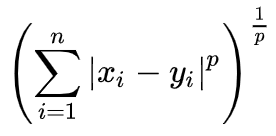</center>

#### k-Nearest Neighbors Model

- [K-Nearest Neighbours](https://scikit-learn.org/stable/modules/neighbors.html#classification)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [4]:
# Inputs of the model. Change accordingly to perform feature selection
INPUTS_KNN = input_vars

# Define hyperparameters of the model
k = 31 # Number of nearest neighbors
p = 2 # Order of Minkowski distance (what distance is this?)

# Create a model object
knn_fit = knn()
print(knn_fit)

kNN model (k=None, p=None)


In [14]:
# Train model
knn_fit.fit(X_train[INPUTS_KNN].values, y_train.values, k=k, p=p)
print("kNN Trained")
print(knn_fit)
print((X_train[INPUTS_KNN].values, y_train.values, k, p))

kNN Trained
kNN model (k=31, p=2)
(array([[ 0.70809835, -1.55143572],
       [ 0.5583679 ,  1.38742456],
       [ 0.44541653, -0.73884674],
       ...,
       [ 0.6362097 , -0.57838767],
       [-1.21629824,  0.31936169],
       [-0.70509384, -0.32397602]]), array(['YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'YES', 

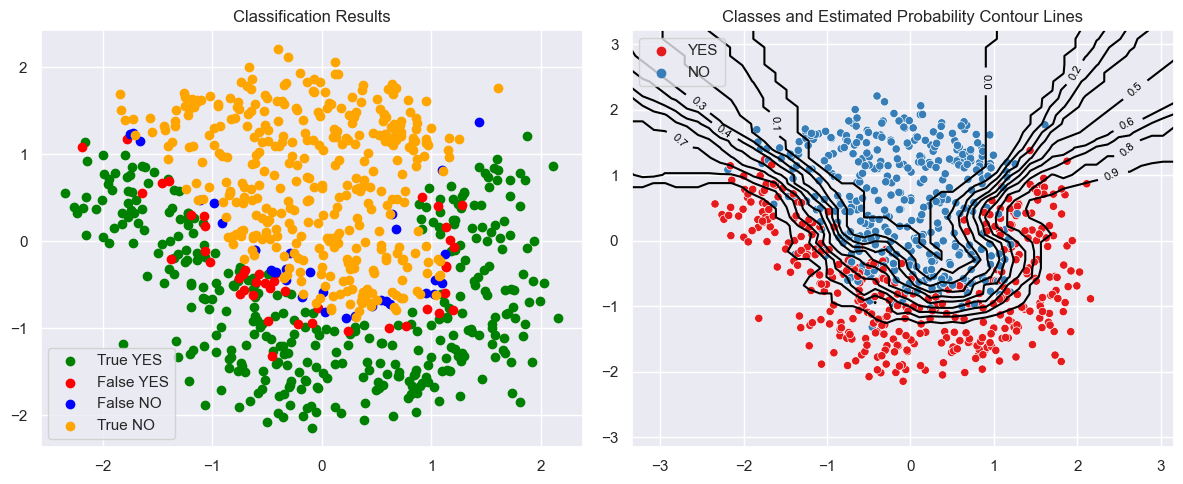

In [6]:
model_predictions = plot_2Dmodel_predictions(X_train[INPUTS_KNN].values, y_train.values, knn_fit, 50)

In [7]:
# Obtain train performance metrics
evaluate_classification_metrics(y_train, knn_fit.predict(X_train[INPUTS_KNN].values), 'YES')

{'Confusion Matrix': [366, 44, 33, 354],
 'Accuracy': 0.903387703889586,
 'Precision': 0.8894472361809045,
 'Recall': 0.9147286821705426,
 'Specificity': 0.8926829268292683,
 'F1 Score': 0.9019108280254776}

In [8]:
# Obtain test performance metrics
evaluate_classification_metrics(y_test, knn_fit.predict(X_test[INPUTS_KNN].values),  'YES')

{'Confusion Matrix': [73, 14, 8, 104],
 'Accuracy': 0.8894472361809045,
 'Precision': 0.8813559322033898,
 'Recall': 0.9285714285714286,
 'Specificity': 0.8390804597701149,
 'F1 Score': 0.9043478260869564}

In [9]:
probs = knn_fit.predict_proba(X_train.values)

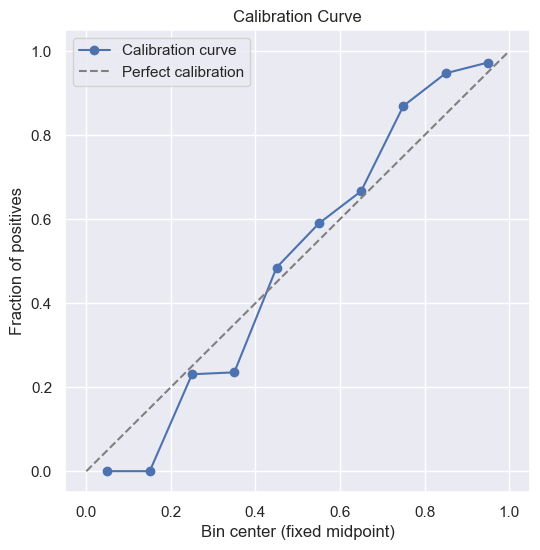

In [10]:
calibration_curve = plot_calibration_curve(y_train.values, probs[:,1], 'YES')

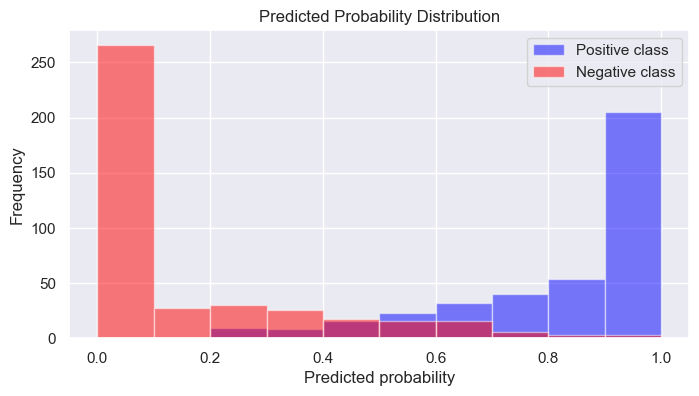

In [11]:
probability_histograms = plot_probability_histograms(y_train.values, probs[:,1], 'YES')

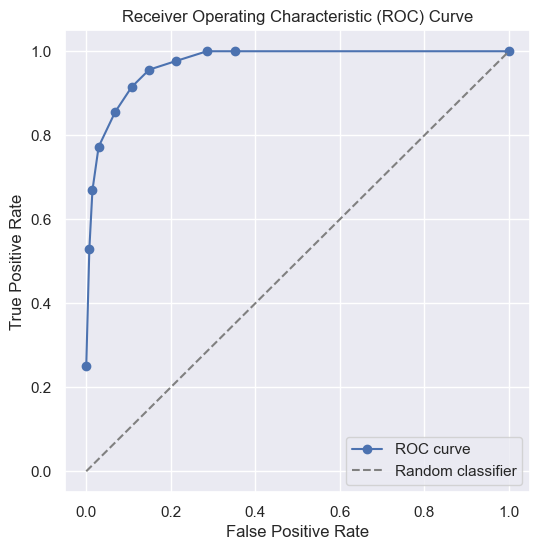

In [12]:
roc_curve = plot_roc_curve(y_train.values, probs[:,1], 'YES')